In [1]:
import goatools


In [2]:
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()



  wget.download(http://purl.obolibrary.org/obo/go/go-basic.obo out=go-basic.obo)


In [5]:
from goatools.go_enrichment import GOEnrichmentStudy



In [29]:
from goatools.test_data.genes_NCBI_10090_ProteinCoding import GeneID2nt as GeneID2nt_mus

  20,074 items READ: gene2go


In [2]:
omauniverse ={}
with open('oma-go.txt' , 'r')as omago:
    for line in omago:
        stuff = line.split()
        if stuff[0] in omauniverse:
            omauniverse[stuff[0]].add(stuff[1])
        else:
            omauniverse[stuff[0]] = set([stuff[1]])
            

In [5]:
from goatools.obo_parser import GODag
from goatools.go_enrichment import GOEnrichmentStudy

obodag = GODag("go-basic.obo")
goeaobj = GOEnrichmentStudy(
        omauniverse.keys()), # List of mouse protein-coding genes
        omauniverse, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh'])

IndentationError: unexpected indent (<ipython-input-5-063ab636b371>, line 9)

In [ ]:
import pickle 
with open('omauniverse.pkl', 'wb') as goeanalysis:
    goeanalysis.write(pickle.dumps(omauniverse, -1))

In [ ]:
from goatools.godag_plot import plot_gos, plot_results, plot_goid2goobj
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]


In [7]:
hapenrich = 'hap2allenrichment.txt' 
haphogs ='hap2allHogs2Prots.pkl'
wntenrich = 'wnt_metaenrichment.txt'
wnthogs = 'wnt_metaHogs2Prots.pkl'

GO:0016036 BP 0.00e+00 167/4085 1021/8270255 07 cellular response to phosphate starvation 
GO:0005976 BP 5.08e-169 110/4085 2607/8270255 04 polysaccharide metabolic process 
GO:0006788 BP 7.69e-146 77/4085 828/8270255 07 heme oxidation 
GO:0006081 BP 1.93e-140 105/4085 3935/8270255 03 cellular aldehyde metabolic process 
GO:0044262 BP 3.20e-123 111/4085 7061/8270255 04 cellular carbohydrate metabolic process 


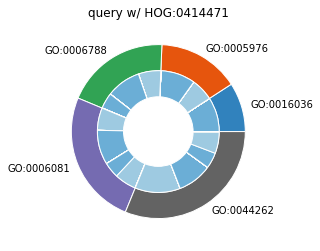

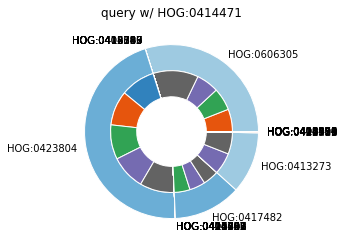

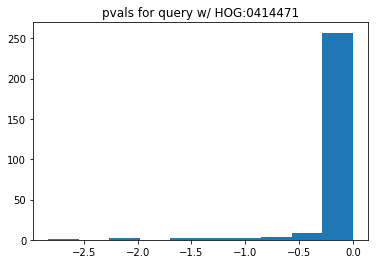

In [19]:
import glob 
                
import matplotlib.pyplot as plt
import numpy as np
import pickle
#GO:0034502 BP 0.00e+00 153/7971 251/8270255 06 protein localization to chromosome       AGABI06307, AILME13
#textfiles = glob.glob( 'enrichment/HOG:*.txt')

#textfiles = glob.glob( 'enrichment/*.txt')


#print(textfiles)

#for filename in textfiles:
    # 
filename = hapenrich
filtered = pickle.loads( open(haphogs,'r').read())


allprots={}
counts={}
hogindex={}
#print(filtered[hog])

for i , hogname in enumerate(filtered):
    #print(hogname)
    reverse = { str(prot):hogname for prot in filtered[hogname] }
    allprots.update(reverse)
    counts[hogname]=0
    hogindex[hogname]=i

#print(allprots)
#print(counts)

with open( filename , 'r') as filein:
    vals = np.zeros( (5,40))
    GOterms = []

    pvals = []
    depths = []

    for i,line in enumerate(filein):
        words = line.split(',')
        if i < 5:
            prots = words[1:]
            prots += words[0].split()[-1]
            GOterms.append(words[0].split()[0])
            description= ''.join( [ word + ' ' for word in words[0].split()[0:-1] ] )
            print(description)
            for prot in prots:
                try:
                    counts[allprots[prot.strip()]]+=1
                except:
                    pass
            #print(counts)
            for col,hog in enumerate(counts):
                vals[i,col] = counts[hog]
        if int(words[0].split()[3].split('/')[0])>0 and float(words[0].split()[2]) <1:
            pvals.append(float(words[0].split()[2]))

    %matplotlib inline

    fig, ax = plt.subplots()

    size = 0.3

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(len(GOterms))*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9]))

    ax.pie(vals.sum(axis=1),  labels=GOterms ,radius=1, colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'))
    ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
           wedgeprops=dict(width=size, edgecolor='w'))
    ax.set(aspect="equal", title= 'query w/ '+ hog)

    #### do the inverse
    fig, ax = plt.subplots()

    size = 0.3
    cmap = plt.get_cmap("tab20c")
    inner_colors = cmap(np.arange(len(GOterms))*4)
    outer_colors = cmap(np.array([1, 2, 5, 6, 9]))
    labels = [ c  if counts[c]>50 else ''  for c in counts.keys() ]
    ax.pie(vals.sum(axis=0),  labels=list(counts.keys()) ,radius=1, colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'))
    ax.pie(vals.T.flatten(), radius=1-size, colors=inner_colors,
           wedgeprops=dict(width=size, edgecolor='w'))
    ax.set(aspect="equal", title= 'query w/ '+ hog)
    plt.show()

        #print(prots)
        #prots = [ prot.replace(',','') for prot in words[:]

    fig, ax = plt.subplots()

    size = 0.3
    ax.hist( np.log(1-np.asarray(pvals)), bins = 10)
    ax.set( title= 'pvals for query w/ '+ hog)
    plt.show()


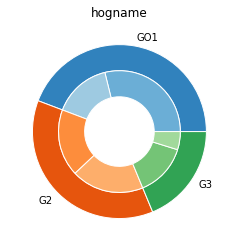

In [26]:




import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)

inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
labels = ['GO1','G2','G3']
ax.pie(vals.sum(axis=1), labels=labels , radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='hogname')
plt.show()

In [20]:
import pandas as pd

In [24]:
df =pd.read_csv('orfsfound.csv')
#df.to_html('temp.html')
df.to_()
